In [14]:
import sys
import os
import re

from pathlib import Path

In [15]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)

f:\Vital Stuff\Εργασίες Σχολείου\The dreadful present\Μαστερ\Μαστερ Εξάμηνο 2ο\Machine Learning in Computational Biology\Project\FinalProject\MLKinCompBioFinalProject


In [16]:
%load_ext autoreload
%autoreload 2

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
X_df=produce_df(hy_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_subset_10k_cells.h5ad",
                    th_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-TH-log2_subset_10k_cells.h5ad",
                    verbose=False)

my_file = Path("../data/merged_train_subset10k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/merged_train_subset10k.csv",index=False)

test_df=produce_df(hy_path="../data/abc_atlas/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HY-log2_subset_3k_cells.h5ad",
                    th_path="../data/abc_atlas/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-TH-log2_subset_3k_cells.h5ad",
                    verbose=False,test=True)

my_file = Path("../data/merged_test_subset3k_v2.csv")

if not my_file.is_file():
    test_df.to_csv("../data/merged_test_subset3k_v2.csv",index=False)


Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000042501', 'ENSMUSG00000048960',
       'ENSMUSG00000101314', 'ENSMUSG00000067813', 'ENSMUSG00000067780',
       'ENSMUSG00000025776',
       ...
       'ENSMUSG00000041380', 'ENSMUSG00000015405', 'ENSMUSG00000031377',
       'ENSMUSG00000086008', 'ENSMUSG00000087340', 'ENSMUSG00000044583',
       'ENSMUSG00000031355', 'ENSMUSG00000072844', 'ENSMUSG00000103994',
       'ENSMUSG00000102045'],
      dtype='object', name='gene_identifier', length=2000)
Index(['ENSMUSG00000025902', 'ENSMUSG00000002459', 'ENSMUSG00000033740',
       'ENSMUSG00000079671', 'ENSMUSG00000067879', 'ENSMUSG00000048960',
       'ENSMUSG00000025932', 'ENSMUSG00000101640', 'ENSMUSG00000025927',
       'ENSMUSG00000025931',
       ...
       'ENSMUSG00000025283', 'ENSMUSG00000084932', 'ENSMUSG00000015405',
       'ENSMUSG00000031377', 'ENSMUSG00000031342', 'ENSMUSG00000044583',
       'ENSMUSG00000031355',

In [18]:
common_columns = X_df.columns.intersection(test_df.columns)

X_df=X_df[common_columns].copy()
print(X_df.shape)
test_df=test_df[common_columns].copy()
print(test_df.shape)

(20000, 764)
(6000, 764)


In [19]:

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/merged_train_subset3k.csv')

The winner method is LightGBM with 9/9 metrics
 ALL HAIL THE KING!


<Axes: title={'center': 'Repeated nested CV metrics for 3k cell and top 2k genes'}, xlabel='Model'>

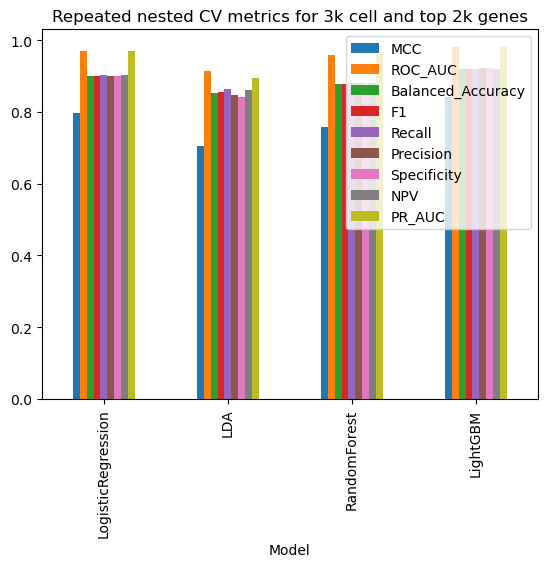

In [20]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

results_df.plot(x='Model',kind='bar',stacked=False,title='Repeated nested CV metrics for 3k cell and top 2k genes')

[I 2025-06-23 21:07:19,062] A new study created in memory with name: Winner:LightGBM
[I 2025-06-23 21:08:55,453] Trial 0 finished with value: 0.9157 and parameters: {'n_estimators': 446, 'max_depth': 12, 'learning_rate': 0.013160927980817985, 'verbosity': -1}. Best is trial 0 with value: 0.9157.
[I 2025-06-23 21:09:29,602] Trial 1 finished with value: 0.8989 and parameters: {'n_estimators': 158, 'max_depth': 9, 'learning_rate': 0.02038346660390676, 'verbosity': -1}. Best is trial 0 with value: 0.9157.
[I 2025-06-23 21:10:13,762] Trial 2 finished with value: 0.92735 and parameters: {'n_estimators': 229, 'max_depth': 12, 'learning_rate': 0.09549253042775838, 'verbosity': -1}. Best is trial 2 with value: 0.92735.
[I 2025-06-23 21:10:43,991] Trial 3 finished with value: 0.9091000000000001 and parameters: {'n_estimators': 152, 'max_depth': 8, 'learning_rate': 0.035329025221583744, 'verbosity': -1}. Best is trial 2 with value: 0.92735.
[I 2025-06-23 21:12:06,213] Trial 4 finished with value:

For model LightGBM the best parameters are {'n_estimators': 229, 'max_depth': 12, 'learning_rate': 0.09549253042775838, 'verbosity': -1}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.9052, 0.9194]
F1 Score       : [0.9074, 0.9216]
Precision      : [0.8820, 0.9034]
Recall         : [0.9281, 0.9455]
MCC            : [0.8114, 0.8398]
ROC AUC        : [0.9742, 0.9800]
PR AUC         : [0.9756, 0.9814]
Specificity         : 0.8877
NPV                 : 0.9337


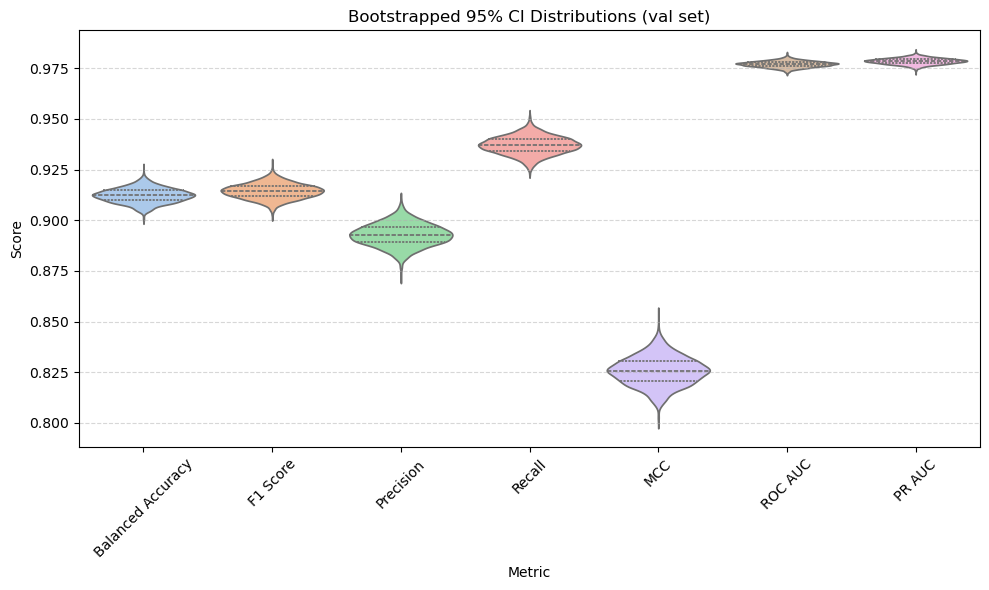

In [21]:
tuned_winner_dev=winner_tuning(df=X_df,winner=winner[0])
bootstrap_model(df_dev=X_df,df_val=test_df,model=tuned_winner_dev)